# Denoising and meta genes analysis of 10x Visium human breast cancer slice

In this tutorial, we demonstrate SpaSRL on the gene expression denoising and functional meta genes analysis of 10x Visium Human Breast Cancer (Block A Section 1) slice including

* Gene expression denoising
* Functional meta genes

The dataset is available at [10x genomics website](https://www.10xgenomics.com/resources/datasets) (Spatial Gene Expression >> Visium Demonstration (v1 Chemistry) >> Space Ranger 1.0.0 >> Human Breast Cancer (Block A Section 1)).

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import SpaSRL

%matplotlib inline

## Data loading and preprocessing

We load the dataset after spatially aware self-representation learning in previous tutorial.

In [2]:
adata = sc.read_h5ad('./data/BC_results.h5ad')
adata

AnnData object with n_obs × n_vars = 3813 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden', 'leiden_refined', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'annotation_colors', 'hvg', 'leiden', 'leiden_refined_colors', 'pca', 'rank_genes_groups', 'representation', 'spatial', 'spatial_enhancement'
    obsm: 'spatial'
    varm: 'PCs'
    layers: 'counts', 'log1p'
    obsp: 'representation'

## Gene expression denoising

We perform gene expression denoising using representation matrix.

In [3]:
SpaSRL.expression_denoising(adata)

We show the spatial expression pattern of *TTLL12* (differentially expressed in tumor domain) before and after denoising.

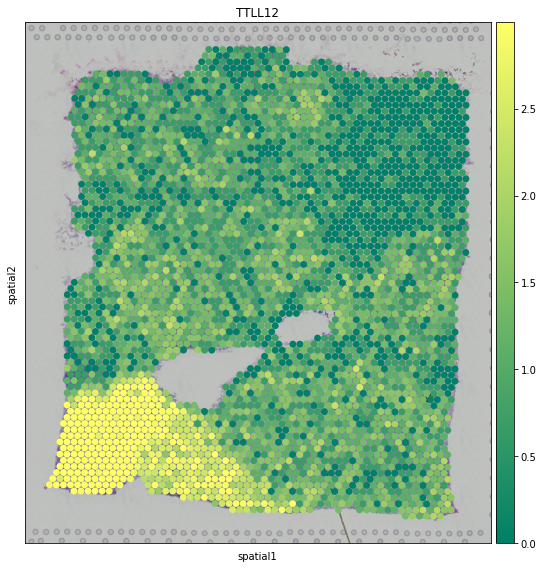

In [4]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='TTLL12',
    layer='log1p',
    size=1.5,
    cmap='summer',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()

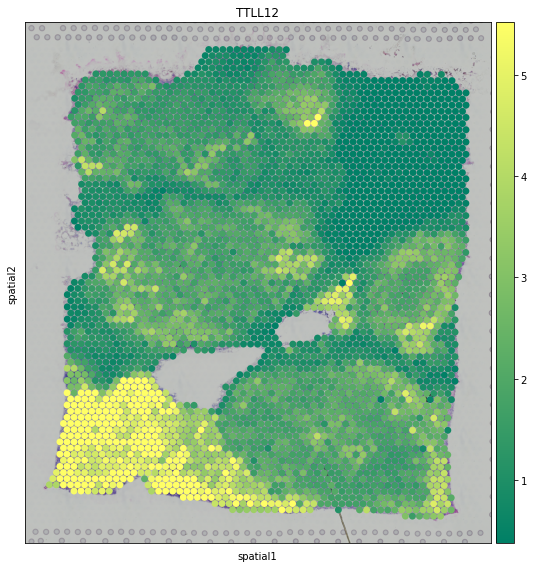

In [5]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='TTLL12',
    size=1.5,
    cmap='summer',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()

We also show the spatial expression pattern of *IGHG2* (differentially expressed in immune domain) before and after denoising.

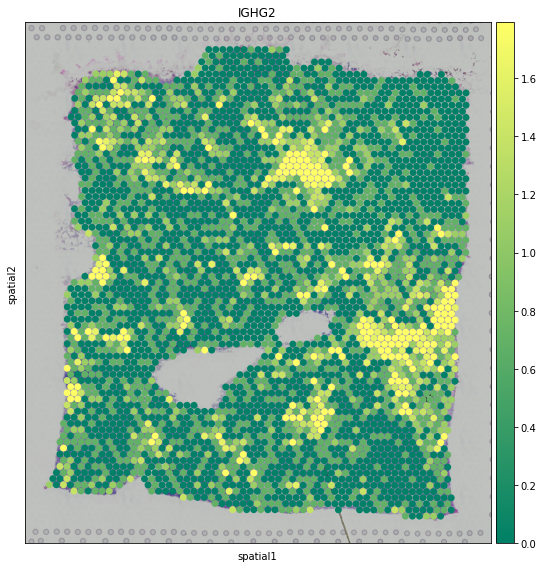

In [6]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='IGHG2',
    layer='log1p',
    size=1.5,
    cmap='summer',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()

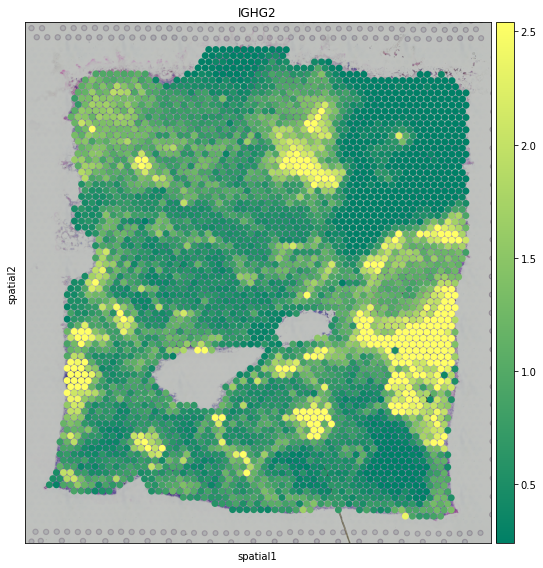

In [7]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata,
    img_key='hires',
    color='IGHG2',
    size=1.5,
    cmap='summer',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()

## Functional meta genes

We compute functional meta gene score matrix using discriminant matrix.

In [8]:
SpaSRL.get_meta_genes(adata)

We create a new object `adata_meta_genes` using the meta gene score matrix for visualization.

In [9]:
adata_meta_genes = sc.AnnData(adata.obsm['meta_genes'])
adata_meta_genes.obs = adata.obs.copy()
adata_meta_genes.obsm = adata.obsm.copy()
adata_meta_genes.uns['spatial'] = adata.uns['spatial'].copy()
sc.pp.scale(adata_meta_genes)

We show the spatial meta gene score pattern of 3 representative meta genes.

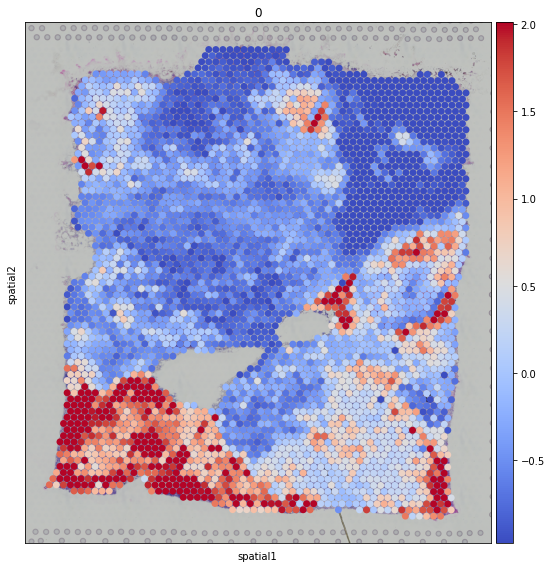

In [10]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_meta_genes,
    img_key='hires',
    color='0',
    size=1.5,
    cmap='coolwarm',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()

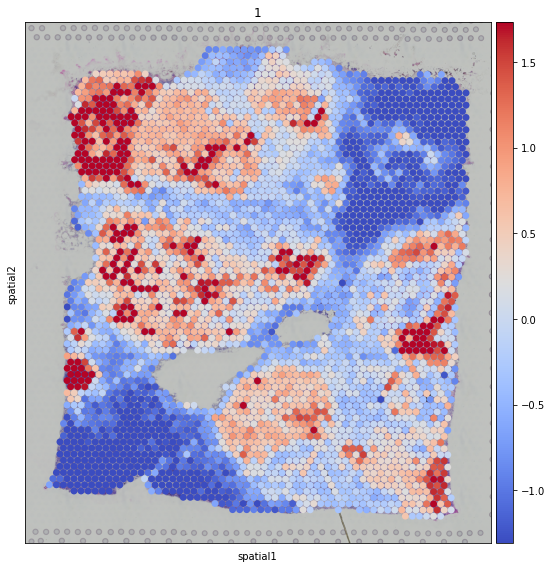

In [11]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_meta_genes,
    img_key='hires',
    color='1',
    size=1.5,
    cmap='coolwarm',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()

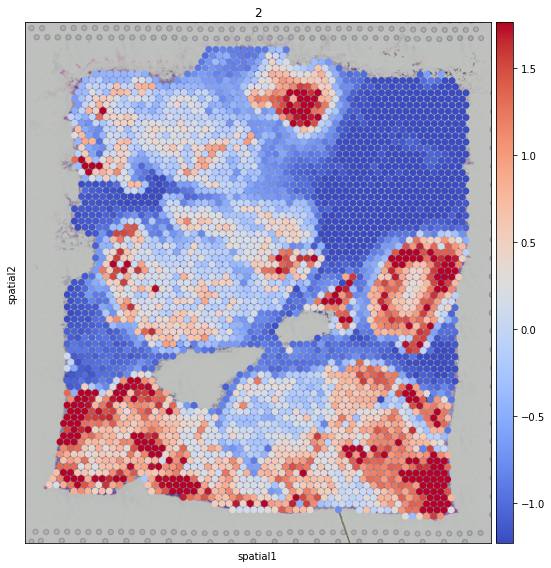

In [12]:
fig, axs = plt.subplots(figsize=(8, 8))

sc.pl.spatial(
    adata_meta_genes,
    img_key='hires',
    color='2',
    size=1.5,
    cmap='coolwarm',
    vmin='p10',
    vmax='p95',
    show=False,
    ax=axs,
)

plt.tight_layout()